**Neural Network** adalah proses penginputan data dan menerima data (output) yang memiliki layer dengan teknik mapping dan metode Probabilitas. ada input layer, output layer dan hidden layer (dimana data di proses). contoh dari neural network adalah Node. Setiap node yang terhubung ke layer sebelumnya disebut densely connected layer. Garis penghubung antar node disebut weight



**Bias** adalah sebuah node yang muncul dan memiliki value numerik yang kita gunakan sebagai trained parameter (sesuai kebutuhan pada NN). Bias tidak memiliki input arrow karena dia hanya merupakan nilai konstan. bias biasanya memiliki weight = 1


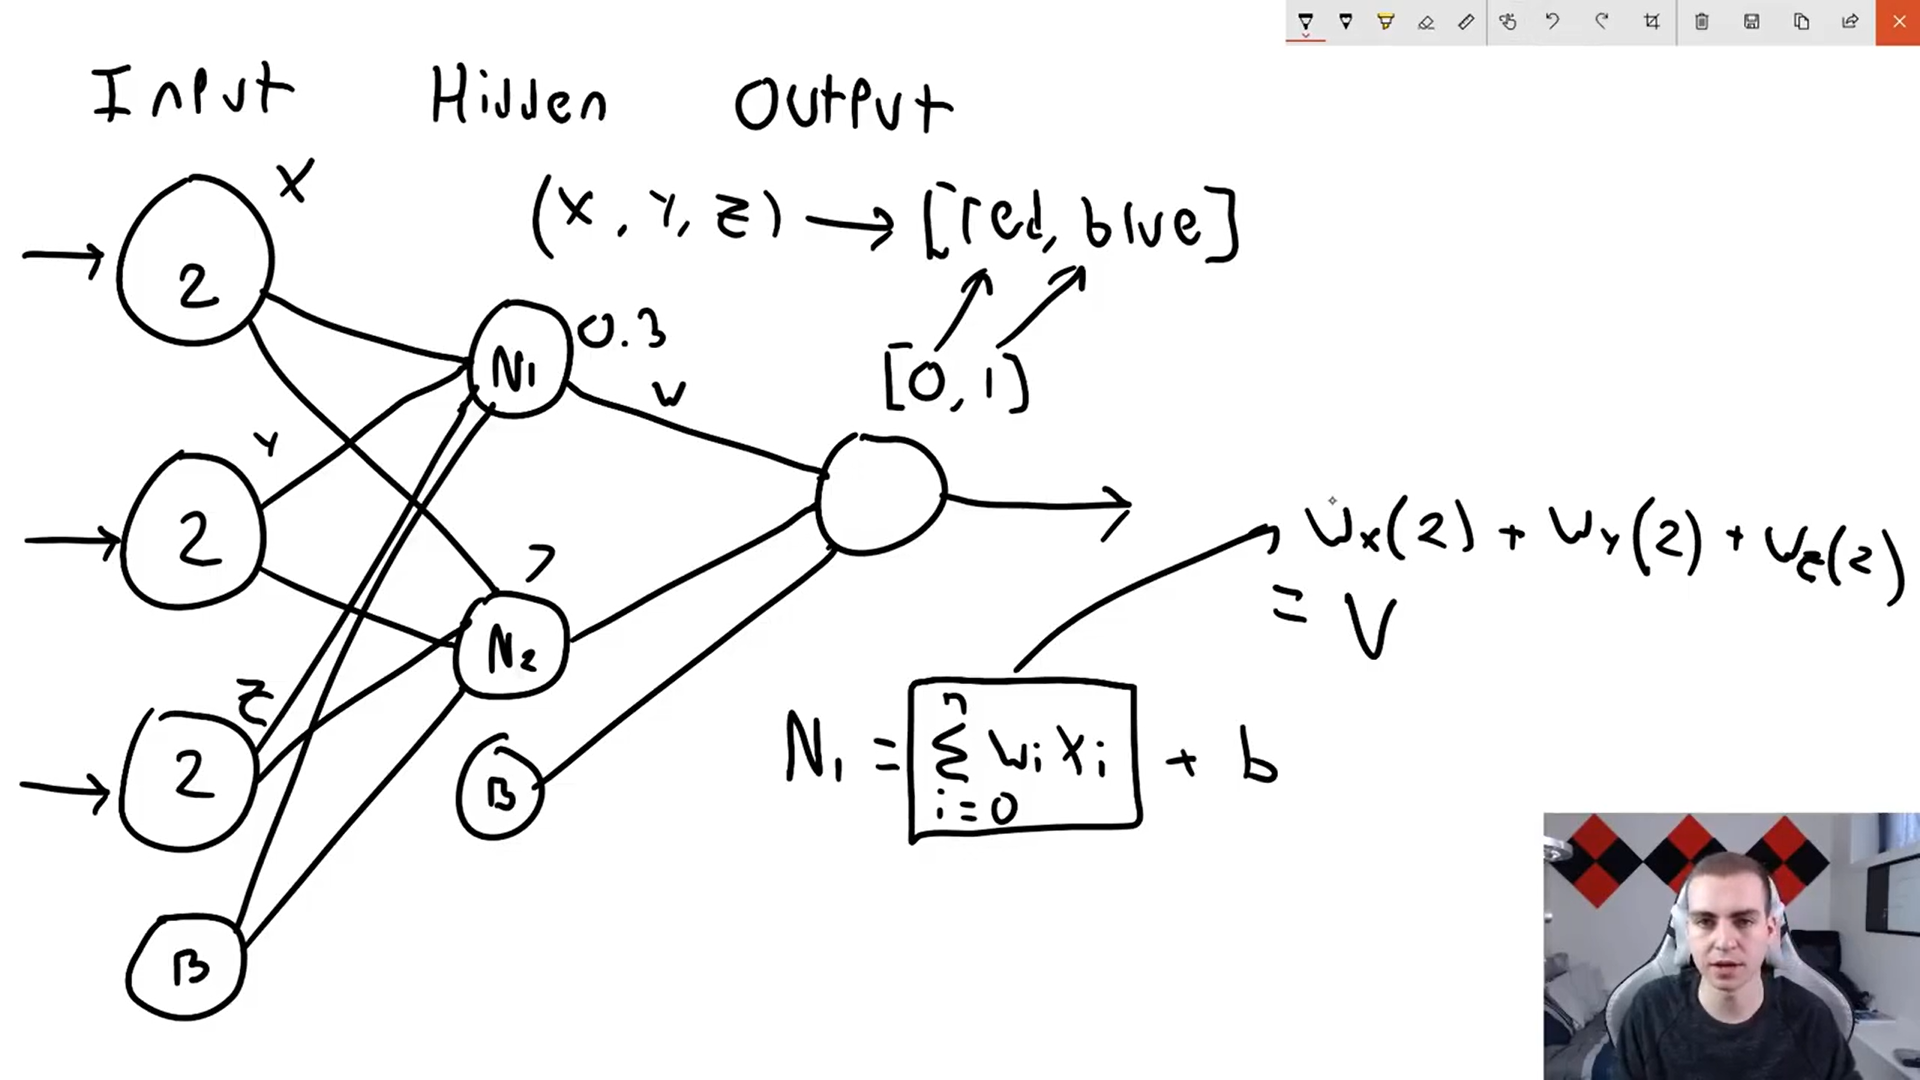

**Activation Function** digunakan untuk memberikan hasil yang lebih tepat terhadap NN kita dengan cara membuat dimensi yang lebih besar untuk output yang lebih kompleks pula.

**Sigmoid** adalah teknik perhitungan yang digunakan untuk menyempitkan hasil output NN menjadi 0 atau 1. mempermudah kita untuk menentukan klasifikasi output

**Loss Function** adalah teknik yang digunakan untuk menghitung berapa jauhnya output dari ekspektasi kita

**Gradient Descent** adalah teknik yang digunakan untuk menghitung kedalaman nilai NN. apabila kedalaman telah dihitung, maka Loss function akan memberitahu apakah hasilnya bagus atau tidak. jika tidak, kita mengubah arah NN untuk mendapatkan hasil Loss Function yang lebih baik agar NN kita semakin bagus

**Backpropagation** menghitung kembali weight dan bias berdasarkan nilai Gradient Descent untuk memperbaiki NN kita.

**Optimizer** adalah algoritma yang digunakan untuk melakukan Gradient Descent dan Backpropagation serta beberapa algoritma umum lainnya

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

**Dataset**

MNIST Fashion Dataset yang ada di Keras dan memiliki 60k image untuk training dan 10k untuk testing


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist # load 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # membagi testing dan training

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0,23,23]

194

Pixel memiliki values 0 - 255, 0 berarti hitam dan 255 berarti putih. berarti ada grayscale karena tidak ada warna selain hitam dan putih

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Hasil akan menunjukkan 0 - 9, kita akan memberikan nama untuk setiap angka

In [ ]:
class_names = ['T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

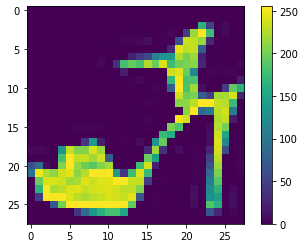

In [ ]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

**Data** **Preprocessing**

Sebelum membuat model, kita akan melakukan preprocessing untuk memudahkan NN dalam mengolah data yang akan kita masukkan. untuk grayscale, kita akan masukkan 255 karena range pixel (0-255). semakin kecil angkanya, semakin mudah NN mengolah data kita karena tidak sulit untuk mengubah Weight dan Bias lagi

In [ ]:
train_images =  train_images / 255.0

test_images = test_images / 255.0

**Building the Model**

Membangun model menggunakan Keras Sequential Model dengan tiga layer berbeda. model ini disebut juga feed-forward Neural Network (value diberikan dari kiri ke kanan) 

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer 1
    keras.layers.Dense(128, activation='relu'), # hidden layer 2
    keras.layers.Dense(10, activation='softmax') # output layer 3
])

**Compiling the Model**

In [ ]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

**Training the Model**

In [ ]:
model.fit(train_images, train_labels, epochs=10) # Epochs adalah hyper parameter

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4995 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3764 - accuracy: 0.8622
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3367 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3136 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2975 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2825 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2677 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2582 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2476 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

**Evaluate the Model**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1) # Verbose adalah berapa banyak output yang akan dikeluarkan konsol

print('Akurasi = ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8824
Akurasi =  0.8823999762535095


Akurasi pada training data lebih besar dari testing. hal ini disebut **Overfitting**. Overfitting terjadi karena pada training data, komputer melihat data yang sama terlalu sering, sehingga dapat menghafal gambar tersebut. pada testing, hanya ada 10 epochs, sehingga komputer melihat gambarnya tidak sesering ketika saat di training

**Membuat Prediksi**



313/313 [==============================] - 0s 2ms/step
Ankle Boot


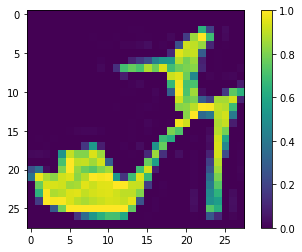

In [ ]:
predictions = model.predict(test_images)

print(class_names[np.argmax(predictions[0])]) # Menunjukkan kelas dari pakaian 

plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

**Test**

Pilih sebuah angka = 43
1/1 [==============================] - 0s 19ms/step


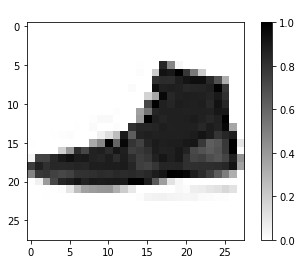

In [30]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image,class_names[correct_label],predicted_class)

def show_image(img,label,guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Ekspektasi = " + label)
  plt.xlabel("Prediksi = " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
    while True:
      num = input("Pilih sebuah angka = ")
      if num.isdigit():
        num = int(num)
        if 0 <= num <= 1000:
            return int(num)
        else:
          print("Coba lagi!")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
